<br/>
  <FONT size ="3pt"> MODAL MAP471A : Problem solving en math app </FONT>   
  
---
---
<FONT size ="5pt"> TP déterministe 4 : <center><b>Encodage et décodage d'image JPEG</b>  </center></FONT> 

---
---
<br /> 

Dans ce TP, on va reconstruire les fonctions à la base de la compression d'image en JPEG. Quelques fonctions de visualisation vous sont données ainsi qu'une image (ici au format png) pour tester vos fonctions et les debugger.

In [9]:
# importation de fonctions et de librairies
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import fftpack

## Représentation d'une image .png en RGB

Une façon de représenter une image est d'utiliser la base RGB (Red-Green-Blue). Dans le code ci-dessous, on extrait d'une image au format .png, les coordonnées dans la base RGB de la couleur de chacun de ses pixels. La compression jpeg va agir séparemment sur chacune des composantes R, G ou B (c'est-à-dire sur chacun des tableaux `M_R`, `M_G` ou `M_B`).

In [13]:
def png_2_RGB(file):
    """
    Convertit l'image 'file' au format png en 3 matrices 
    -------------
    paramètres :
    file : nom du fichier png à convertir 
    
    retourne :
    M_R, M_G, M_B : les matrices contenant l'intensité (sur 255) repectivement du rouge, vert et bleu en chaque point 
    """
    
    #plt.imread retourne l'image au bon format avec une quatrième valeur pour la transparence qu'on ne conserve pas 
    M_RGB  = plt.imread(file)[:,:,:3]
    #M_RGB contient des valeurs entre 0 et 1 qui correspondent en fait à des entiers entre 0 et 255
    M_RGB *= 255
    #passage en entier (le stockage des entier allant de 1 à 255 est plus faible que celui des flottants)
    M_RGB  = M_RGB.astype(int)
    
    return M_RGB[:,:,0], M_RGB[:,:,1], M_RGB[:,:,2]


# on utilisera dans un premier temps l'image suivante
M_R, M_G, M_B = png_2_RGB('TP4_image_OG.png')

In [14]:
M_R

array([[205, 205, 158, ..., 101, 102, 101],
       [200, 202, 158, ..., 105, 109, 106],
       [202, 202, 155, ..., 106, 110, 110],
       ...,
       [ 46,  42,  43, ...,  77,  77,  79],
       [ 49,  51,  60, ...,  63,  62,  64],
       [ 77,  79,  85, ...,  67,  65,  64]])

On se servira régulièrement des représentations graphiques pour tester les différentes implémentations. On vous donne pour cela la fonction suivante qui prend en entrée trois matrices (typiquement les matrices RGB données précédemment) et qui trace les images correspondantes. 

*Remarques :* Les matrices ne présentent qu'une intensité de couleur (rouge, vert ou bleu) et pas de teinte. On a ainsi affiché ces teintes en noir et blanc (noir=0 et blanc=255). 

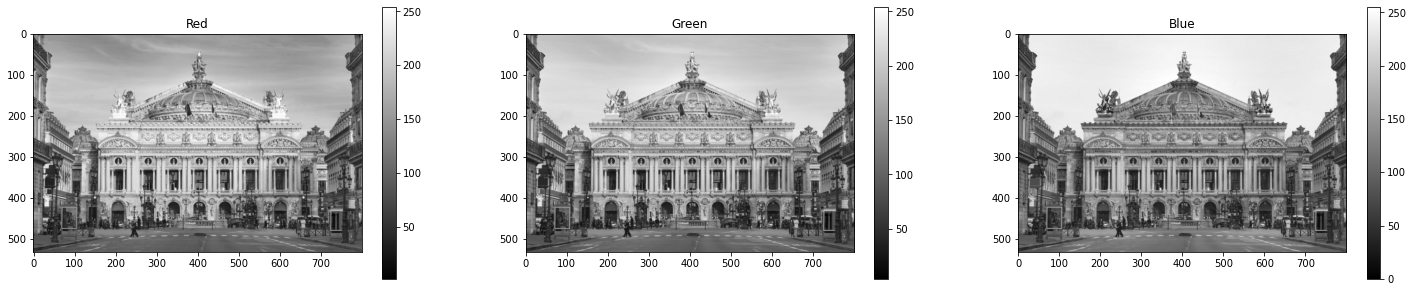

In [15]:
def plot_3_img(M1, M2, M3, t1='',t2='',t3=''):
    """
    Trace les images 2D à partir des matrices d'intensité 
    (chaque entrée M_ij correspond à l'intensité du point à la i-ème ligne et j-ème colonne) 
    -------------
    paramètres :
    M1, M2, M3 : matrices d'intensité 
    t1, t2, t3: (optionnel) chaines de caractères qui donnent le titre à afficher pour chaque tracé    
    
    retourne :
    rien
    """
    plt.figure(figsize=(25, 5))
      
    plt.subplot(131)
    plt.imshow(M1, cmap='gray')
    plt.title(t1)
    plt.colorbar()

    plt.subplot(132)
    plt.imshow(M2, cmap='gray')
    plt.title(t2)
    plt.colorbar()

    plt.subplot(133)
    plt.imshow(M3, cmap='gray')
    plt.title(t3)
    plt.colorbar()
 
    plt.show()
    

plot_3_img(M_R, M_G, M_B,'Red','Green','Blue')

La fonction `imshow` permet d'afficher des couleurs si les trois cartes d'intensité des couleurs R, G et B lui sont données. Il faut pour cela construire un tableau de taille `Nx` $\times$ `Ny` $\times$3 contenant les trois cartes dans l'ordre R, G, B. 

- Ecrire une fonction qui assemble trois matrices R, G, B (de même taille) en un seul tableau de taille `Nx` $\times$ `Ny` $\times$ 3.
- Tester votre fonction avec les cartes RGB calculées précédemment pour réassembler l'image.
- Visualiser l'image complète obtenue avec `imshow`.

In [63]:
def full_img(MR, MG, MB):
    """
    construit la matrice Nx x Ny x 3
    -------------
    paramètres :
    MR, MG, MB : matrices d'intensité (de taille Nx x Ny) 
    t1, t2, t3 (optionnels) : chaines de caractères qui donnent le titre à afficher pour chaque tracé    
    
    retourne : 
    M  : matrice tridimensionnelle contenant MR, MG, MB
    """
    Nx = MR.shape[0]
    Ny = MR.shape[1]
    M = np.zeros((Nx,Ny,3), dtype=int)

    M[:,:,0] = MR
    M[:,:,1] = MG
    M[:,:,2] = MB

    return M

In [64]:
M_R.shape[0]

532

In [65]:
full_img(M_R,M_G,M_B)

array([[[205, 201, 173],
        [205, 197, 167],
        [158, 144, 113],
        ...,
        [101,  99,  94],
        [102,  99,  92],
        [101,  96,  90]],

       [[200, 196, 168],
        [202, 195, 165],
        [158, 144, 113],
        ...,
        [105, 102,  97],
        [109, 106, 101],
        [106, 101,  95]],

       [[202, 198, 172],
        [202, 195, 166],
        [155, 143, 114],
        ...,
        [106, 103, 100],
        [110, 107, 102],
        [110, 107, 100]],

       ...,

       [[ 46,  46,  48],
        [ 42,  42,  44],
        [ 43,  43,  45],
        ...,
        [ 77,  74,  81],
        [ 77,  74,  81],
        [ 79,  79,  82]],

       [[ 49,  50,  54],
        [ 51,  52,  56],
        [ 60,  61,  65],
        ...,
        [ 63,  61,  66],
        [ 62,  59,  66],
        [ 64,  62,  66]],

       [[ 77,  78,  83],
        [ 79,  80,  85],
        [ 85,  86,  91],
        ...,
        [ 67,  65,  70],
        [ 65,  63,  68],
        [ 64,  62,  65]]

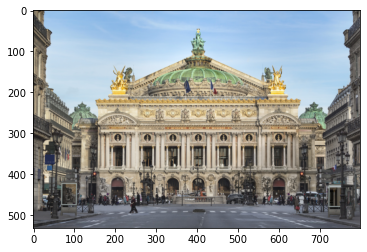

In [66]:
# Visualiser l'image reconstruite 
plt.imshow(full_img(M_R, M_G, M_B))

## Découpage en bloc

Chaque carte de couleur est ensuite découpée en blocs de $8\times 8$ pixels. Le travail de compression s'effectuera sur chacun de ces blocs. 
* Ecrire une fonction `block_decompose` qui prend en entrée un tableau 2d d'entiers et retourne un tableau 4d qui correspond au découpage en blocs de taille $8\times 8$.
* Ecrire une fonction `block_recompose` qui prend en entrée un tableau 4d de blocs de $8\times 8$ pixels et retourne un tableau 2d de pixels.
* Procéder au découpage par blocs de chacune des cartes RGB de votre image avec la fonction block_decompose. Puis, utiliser la fonction block_recompose pour reconstruire l'image complète et l'afficher. Vous devriez voir l'image intiale à laquelle il manquera éventuellement quelques lignes et colonnes de pixels (si les dimensions de l'image ne sont pas un multiple de 8 pixels).

In [86]:
def block_decompose(M):
    """
    Décompose un tableau de pixels en blocs de 8x8 pixels
    ----------   
    Paramètres :
    M : tableau 2d d'entiers
    
    Retourne :
    M_block : conversion de M en un tableau 4d de blocs de 8x8 pixels
    """
    Nx,Ny = M.shape

    Nx8 = int(np.floor(Nx/8))
    Ny8 = int(np.floor(Ny/8))
    
    M_block = np.zeros((Nx8,Ny8,8,8))
    
    for i in range(Nx8):
        for j in range(Ny8):
            xinf = 8*i
            xsup = 8*(i+1)
            yinf = 8*j
            ysup = 8*(j+1)
            M_block[i,j,:,:] = M[xinf:xsup, yinf:ysup]
    return M_block

def block_recompose(M_block):
    """
    Reconstruit un tableau 2d à partir de sa représentation par blocs de taille 8x8
    ----------   
    Paramètres :
    M_block : tableau 4d de blocs de 8x8 pixels
    
    Retourne :
    M : tableau 2d d'entiers
    """

    Nx = M_block.shape[0]
    Ny = M_block.shape[1]
    M = np.zeros((8*Nx,8*Ny))
    for i in range(Nx):
        for j in range(Ny):
            xinf = 8*i
            xsup = 8*(i+1)
            yinf = 8*j
            ysup = 8*(j+1)
            M[xinf:xsup, yinf:ysup] = M_block[i,j,:,:]
    return M

In [87]:
block_decompose(M_R).shape

(66, 100, 8, 8)

In [88]:
M_R.shape

(532, 800)

In [94]:
A = block_decompose(M_R)
B = block_recompose(A)
B.shape

(528, 800)

In [93]:
M_R

array([[205, 205, 158, ..., 101, 102, 101],
       [200, 202, 158, ..., 105, 109, 106],
       [202, 202, 155, ..., 106, 110, 110],
       ...,
       [ 46,  42,  43, ...,  77,  77,  79],
       [ 49,  51,  60, ...,  63,  62,  64],
       [ 77,  79,  85, ...,  67,  65,  64]])

In [91]:
B

array([[205., 205., 158., ..., 101., 102., 101.],
       [200., 202., 158., ..., 105., 109., 106.],
       [202., 202., 155., ..., 106., 110., 110.],
       ...,
       [ 51.,  44.,  47., ...,  72.,  75.,  77.],
       [ 57.,  56.,  58., ...,  74.,  72.,  69.],
       [ 60.,  55.,  57., ...,  81.,  81.,  76.]])

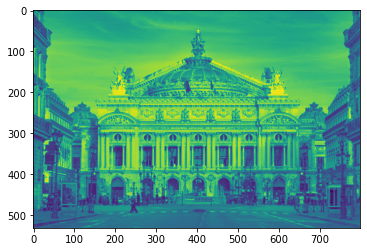

In [98]:
# Visualiser un block
M_R_dec = block_decompose(M_R)
M_G_dec = block_decompose(M_G)
M_B_dec = block_decompose(M_B)

M_R_rec = block_recompose(M_R_dec)
M_G_rec = block_recompose(M_G_dec)
M_B_rec = block_recompose(M_B_dec)

plt.imshow(M_R)


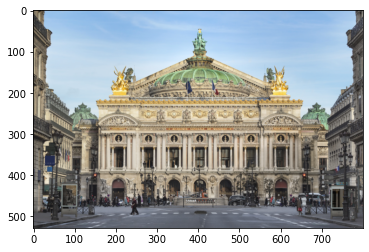

In [99]:
# Visualiser l'image complète après décomposition et recomposition
plt.imshow(full_img(M_R_rec, M_G_rec, M_B_rec))

## DCT : passage dans le domaine fréquentiel (sur un bloc)

La prochaine étape est d'appliquer la transformée en Cosinus Discrète à chacun des blocs de $8 \times 8$ pixels. Pour s'entrainer on travaillera d'abord sur un seul bloc $8 \times 8$ appelé B.
* Appliquer la DCT à B en utilisant la fonction `fftpack.dctn(B, norm = "ortho")` de scipy
* Visualiser B ainsi que sa transformée par la DCT. Ou se trouvent les coefficients de plus forte magnitude ? Vous pouvez tester sur différents blocs (voire différentes images) pour observer que ce comportement est en fait commun. 
* Appliquer la DCT inverse `fftpack.idctn` (avec les bons arguments) et vérifiez que vous retrouvez bien votre bloc B (aux arrondis près).

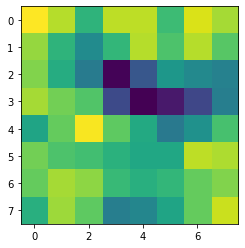

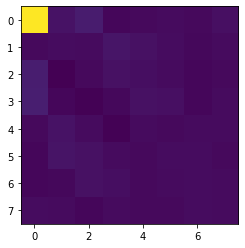

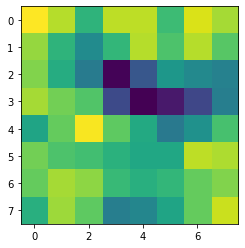

In [118]:
B = M_R_dec[25,31,:]  # vous n'avez probablement pas utilisé la notation M_R_block donc adapter à votre cas
F = fftpack.dctn(B, norm = "ortho") # Orthonormalized type II 2-dimensional dct 
F_inv = fftpack.idctn(F, norm = "ortho")

# Visualiser B, F et la DCT inverse de F
plt.imshow(B)
plt.show()
plt.imshow(F)
plt.show()
plt.imshow(F_inv)
plt.show()

## Quantification (sur un bloc)

On continue à travailler sur un seul bloc de taille $8 \times 8$. L'étape de compression a lieu dans le domaine fréquentiel, c'est-à-dire sur le bloc $B$ après DCT, qu'on peut noter $F$. Chaque coefficient de $F$ est quantifié pour donner $G$:

$$
G_{ij} = \frac{F_{ij}}{Q_{ij}} \text{ arrondi à l'entier le plus proche}
$$

où la matrice de quantification $Q$ est donnée ci-dessous.


In [119]:
Q = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
print(f'Q={Q}')

Q=[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]


* Ecrire une fonction qui effectue la quantification d'un bloc F. 
* L'appliquer au bloc F=dct(B) sur lequel vous avez déja travaillé. Vous devriez voir beaucoup de coefficients nuls.
* Afin de contrôler ce que vous avez fait, effectuer le décodage du bloc en multipliant par Q et en appliquant la DCT inverse. Comparer le résultat avec B.

In [120]:
def quantification(F, Q):
    """
    Divise chaque composante F_{ij} par Q_{ij} et arrondit à l'entier le plus proche
    ----------   
    Paramètres :
    F : tableau 2d de réels
    Q : tableau 2d de réels de la même taille que F (matrice de quantification)
    Retourne :
    G : tableau 2d d'entiers correspondant à la matrice F quantifiée par Q
    """
    Nx = F.shape[0]
    Ny = F.shape[1]
    G = np.zeros((Nx, Ny))

    for i in range(Nx):
        for j in range(Ny):
            G[i,j] = F[i,j]/Q[i,j]
    return np.rint(G)

In [121]:
# Visualisation
G = quantification(F,Q)
G

array([[82.,  3.,  6., -1., -0., -0., -0.,  0.],
       [-0.,  1., -0.,  2.,  1.,  0., -0.,  0.],
       [ 5., -3., -1.,  1.,  0., -0., -0., -0.],
       [ 5., -1., -1., -0.,  0.,  0., -0., -0.],
       [-0.,  1., -0., -1.,  0., -0.,  0., -0.],
       [-1.,  1.,  0., -0., -0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.,  0., -0.],
       [ 0., -0., -0.,  0., -0., -0.,  0.,  0.]])

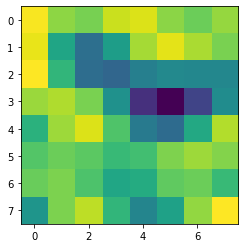

In [122]:
F_inv2 = fftpack.idctn(G*Q)
plt.imshow(F_inv2)

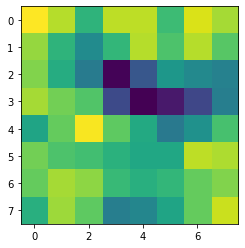

In [123]:
plt.imshow(F_inv)

In [124]:
F_inv - F_inv2

array([[-1487.65158391, -1303.58978042, -1282.31380277, -1412.47244844,
        -1444.66574502, -1314.00925926, -1229.90890607, -1318.0405468 ],
       [-1472.94058287, -1030.37998665,  -770.31423001,  -989.21844507,
        -1345.55558942, -1472.8375286 , -1355.24904507, -1275.23042358],
       [-1513.20634529, -1117.36447943,  -771.1209527 ,  -771.5739078 ,
         -870.17410503,  -898.01954252,  -892.07065302,  -895.47037225],
       [-1327.1046469 , -1372.97727137, -1279.17148342,  -966.26765787,
         -539.03566442,  -364.55018207,  -601.77995799,  -925.84506744],
       [-1098.32961304, -1341.23113225, -1434.10681956, -1185.42800451,
         -812.92429139,  -759.60126121, -1062.83681572, -1387.31997801],
       [-1190.22508055, -1249.64407816, -1218.80290415, -1133.43629948,
        -1165.54112197, -1301.57549896, -1330.7964468 , -1285.76732338],
       [-1241.26262767, -1270.22201422, -1176.60875963, -1031.37637477,
        -1065.19980524, -1232.34448836, -1246.64939171, -1

## Encodage

Au format jpeg, les grandeurs qui sont stockées sont les grandeurs quantifiées (G). Comme on a pu le voir sur l'exemple, il y a beaucoup de coefficients nuls et les coefficients non nuls se trouvent en haut et à gauche du tableau. Cela a du sens car il s'agit des coefficients correspondant aux fréquences les plus basses. 

Pour stocker les valeurs quantifiées, le tableau est parcouru en zig-zag comme illustré ci-dessous

<img src="TP4_zigzag.png" style="width:200px;"/>

A partir d'un certain rang le vecteur obtenu est nul et seules les valeurs qui se trouvent avant ce rang sont stockées selon une méthode de codage entropique appelé codage de Huffman. 
* On vous donne la fonction G_zigzag qui parcourt le bloc pour former le vecteur de ses valeurs dans le bon ordre. L'appliquer à votre bloc quantifié pour vérifier qu'elle est correcte.
* Ecrire une fonction taux_compression qui estime le taux de compression d'un bloc par la valeur $i$/64 où $i$ est le rang à partir duquel toutes les entrées du vecteur sont nulles. Cette fonction fera appel à la fonction G_zigzag.


In [125]:
def G_zigzag(G):
    """
    Transforme une matrice en un vecteur en suivant l'ordre donné par le zig-zag
    -------------
    paramètre :
    G   : matrice carrée
    
    retourne :
    vec : vecteur de taille len(G)*len(G) qui contient les composantes de G dans l'ordre donné par le zig-zag
    """
    return np.concatenate([np.diagonal(G[::-1,:], k)[::(2*(k % 2)-1)] for k in range(1-G.shape[0], G.shape[0])])

In [135]:
# Tester G_zigzag
G_zigzag(G)

array([82.,  3., -0.,  5.,  1.,  6., -1., -0., -3.,  5., -0., -1., -1.,
        2., -0., -0.,  1.,  1., -1.,  1., -1., -0.,  1., -0., -0.,  0.,
        0., -0.,  0., -0., -0.,  0., -1.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,
        0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0.])

In [127]:
G

array([[82.,  3.,  6., -1., -0., -0., -0.,  0.],
       [-0.,  1., -0.,  2.,  1.,  0., -0.,  0.],
       [ 5., -3., -1.,  1.,  0., -0., -0., -0.],
       [ 5., -1., -1., -0.,  0.,  0., -0., -0.],
       [-0.,  1., -0., -1.,  0., -0.,  0., -0.],
       [-1.,  1.,  0., -0., -0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.,  0., -0.],
       [ 0., -0., -0.,  0., -0., -0.,  0.,  0.]])

In [144]:
def taux_compression(G):
    """
    Calcule le taux de compression
    -------------
    paramètre :
    G_vec  : vecteur 
    
    retourne :
    taux : estimation du taux de compression
    """
    Gz = G_zigzag(G)
    x = 0
    i = Gz.shape[0]
    while x == 0:
        i-=1
        x = Gz[i]
    return i/64

In [145]:
taux_compression(G)

0.5

## Mise en oeuvre sur l'image complète

* Ecrire une fonction `compress` qui effectue la DCT et la quantification sur chacun des blocs d'une des cartes RGB de votre image. On retournera aussi l'estimation du taux de compression pour chacune des cartes. (Pour que l'image soit réellement compressée il faudrait procéder à l'encodage de l'image quantifiée mais cela dépasse le cadre de ce TP).
* Ecrire une fonction `decompress` qui décode l'image à partir de l'image quantifiée.
* Appliquer tout le processus de compression/décompression à votre image et comparer à l'image initial.
* Vous pouvez tester votre algorithme avec différentes images.

In [ ]:
def compress(MR, Q):
    """
    Compresse une des carte RGB d'une image  
    -------------
    paramètre :
    MR   : matrice: carte R, G ou B 
    Q    : matrice de quantification (donnée plus haut)
    
    retourne :
    G    : matrice compressée (après DCT et quantification sur chacun des blocs)
    taux : taux de compression estimé
    """
   
    return 

def decompress(GR,Q):
    """
    Déccompresse une matrice de fréquence en carte RGB d'une image  
    -------------
    paramètre :
    GR   : matrice des fréquences 
    Q    : matrice de quantification (donnée plus haut)
    
    retourne :
    MR   : carte RGB (apres multiplication par Q de chacun des blocs et DCT inverse)
    """
   
    return 

In [ ]:
# Cette cellule vous est donnée pour débugger

# Qones = np.ones([8,8]) #peut être utile pour débugger

G_R, tauxR =   compress(M_R, Q)
G_G, tauxG =   compress(M_G, Q)
G_B, tauxB =   compress(M_B, Q)
R          = decompress(G_R, Q)
G          = decompress(G_G, Q)
B          = decompress(G_B, Q)

print(f'Taux de compression moyen = {1./3*(tauxR+tauxG+tauxB)}')
print(f'avec {tauxR} pour R, {tauxG} pour G, {tauxB} pour B')

Image         = full_img(M_R, M_G, M_B)
Image_filtree = full_img(R  ,   G,   B)


plt.figure(figsize=(25, 25))
plt.imshow(Image_filtree)
plt.title('Image filtree')
plt.show()


Difference = Image[:len(Image_filtree[:,0,0]),:len(Image_filtree[0,:,0]),:]-Image_filtree

plot_3_img(Image, Image_filtree, Difference, 'Original', 'Filtree', 'Difference')

print()
plot_3_img(R    ,   G  ,     B, 'R filtree', 'G filtree', 'B filtree')
plot_3_img(M_R  , M_G  ,   M_B, 'R originale', 'G originale', 'B originale')
plot_3_img(R-M_R[:len(R[:,0]),:len(R[0,:])], G-M_G[:len(G[:,0]),:len(G[0,:])], B-M_B[:len(B[:,0]),:len(B[0,:])], 'R difference', 'G difference', 'B difference')

## Pour aller plus loin 




### Format de stockage pour une compression effective

Pour l'instant, les zéros de la matrice des fréquences sont toujours stockés. Pour réduire le stockage de la matrice, on va maintenant chercher à supprimer ces zéros. 

- Proposer un stockage efficace pour minimiser la quantité d'information à stocker. On pourra revenir à la fonction `G_zigzag` donnée dans la partie Encodage.
- Implémenter une fonction transformant le stockage plein en ce format. 
- Comparer la tailler des vecteurs stockées avec chacun des deux stockage. Comparer également avec le taux de compression que vous avez calculé.
- Implémenter une fonction qui permet de tracer une image à partir de votre stockage réduit.

### Standard chromatique YCbCr

Pour un meilleur rendu, d'autres cartes chromatiques sont parfois préféré au RGB. Par exemple, le standard YCbCr consiste à utiliser l'intensité lumineuse $Y = R + G + B$, la distance au bleu $Cb = B-Y$ et la distance au rouge $Cr = R-Y$.

- Implémenter une fonction qui passe une carte RGB en YCbCr et une fonction qui passe une carte YCbCr en RGB.
- Appliquer votre compression sur une carte YCbCr et comparer les résultats avec celui sur la carte RGB.
- De même avec d'autre normes utilisées, cf https://en.wikipedia.org/wiki/YCbCr.

### Sous-échantillonage chromatique

Une première étape de compression est parfois utilisée avant la décomposition en bloc. Cette première décomposition consiste, à partir du standard chromatique YCbCr, à réduire la qualité des couleurs Cb et Cr en gardant la qualité en luminance Y intacte. Pour cela, on réduit simplement la taille de ces matrices. Là-encore, il existe plusieurs standard (cf https://fr.wikipedia.org/wiki/Sous-%C3%A9chantillonnage_de_la_chrominance). Le plus courant est le "4:2:0" qui consiste à ne garder qu'une seule valeur de Cb et de Cr sur chaque bloc de taille $4 \times 4$ (ou à supprimer une valeur sur deux). 

- Implémenter une fonction qui prend en entrée la carte Cb ou Cr de taille $N_x \times N_y$ et renvoie une carte de taille $\frac{N_x}{2} \times \frac{N_y}{2}$.
- Implémenter une fonction qui renconstruit la carte de la bonne taille (malgré la perte d'information).
- Tracer une image reconstruite après avoir fait ce sous-échantillonage. Que se passe-t'il si $N_x$ ou $N_y$ est impaire?